In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df=df.drop(columns=['Id'])

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])

In [9]:
import matplotlib.pyplot as mtp

(array([[ 0.,  0.,  0.,  0.,  0., 11., 48., 49., 31., 11.],
        [ 0.,  0.,  8., 87., 51.,  4.,  0.,  0.,  0.,  0.],
        [ 0., 37., 13.,  1., 10., 34., 30., 20.,  5.,  0.],
        [50., 48., 46.,  6.,  0.,  0.,  0.,  0.,  0.,  0.],
        [50., 50., 50.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.  , 0.79, 1.58, 2.37, 3.16, 3.95, 4.74, 5.53, 6.32, 7.11, 7.9 ]),
 <a list of 5 BarContainer objects>)

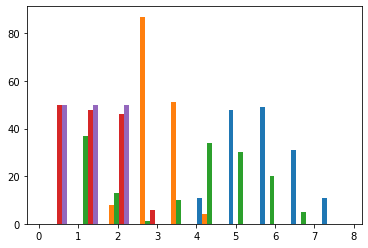

In [10]:
mtp.hist(df)

In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [12]:
X=df.drop(columns=['Species'])
Y=df['Species']

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\Suryadev Zala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X_train,Y_train)

RandomForestClassifier()

In [16]:
Y_pred2 = model2.predict(X_test)

In [17]:
Y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(model.score(X_test,Y_test))

0.9333333333333333


In [19]:
print(model2.score(X_test,Y_test))

0.9111111111111111


In [20]:
cf=confusion_matrix(Y_pred,Y_test)
cf

array([[15,  0,  0],
       [ 0, 15,  2],
       [ 0,  1, 12]], dtype=int64)

In [21]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

